# clustering

ga pake train split karena kita hanya mengelompokkan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.sample(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
34,35,Female,49,33,14
184,185,Female,41,99,39
166,167,Male,42,86,20
24,25,Female,54,28,14


In [4]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [5]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [6]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
# 

In [7]:
kmeans.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [8]:
kmeans_predictions = kmeans.predict(x)

In [9]:
sil_score = silhouette_score(x, kmeans_predictions)
sil_score

0.4937945814354117

# memilih K terbaik
1. coba coba (bruteforce)
2. Elbow Method

In [10]:
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    print(f"Cluster {k} = Silhouette Score = {score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nJumlah cluster terbaik: {best_k} dengan Silhouette Score = {best_score:.4f}")

Cluster 2 = Silhouette Score = 0.3956
Cluster 3 = Silhouette Score = 0.4676
Cluster 4 = Silhouette Score = 0.4938
Cluster 5 = Silhouette Score = 0.5539
Cluster 6 = Silhouette Score = 0.5128
Cluster 7 = Silhouette Score = 0.5017
Cluster 8 = Silhouette Score = 0.4963
Cluster 9 = Silhouette Score = 0.4559
Cluster 10 = Silhouette Score = 0.4426

Jumlah cluster terbaik: 5 dengan Silhouette Score = 0.5539


In [11]:
elbow_score = []
for i in range(1, 11):      # penjelasan k-means++ di menit 1.28
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    elbow_score.append(kmeans.inertia_)

In [12]:
elbow_score

[269981.28,
 183653.32894736843,
 106348.37306211122,
 73880.64496247195,
 44448.4554479337,
 40825.16946386947,
 33642.57922077923,
 26686.83778518779,
 24766.471609793443,
 23103.122085983916]

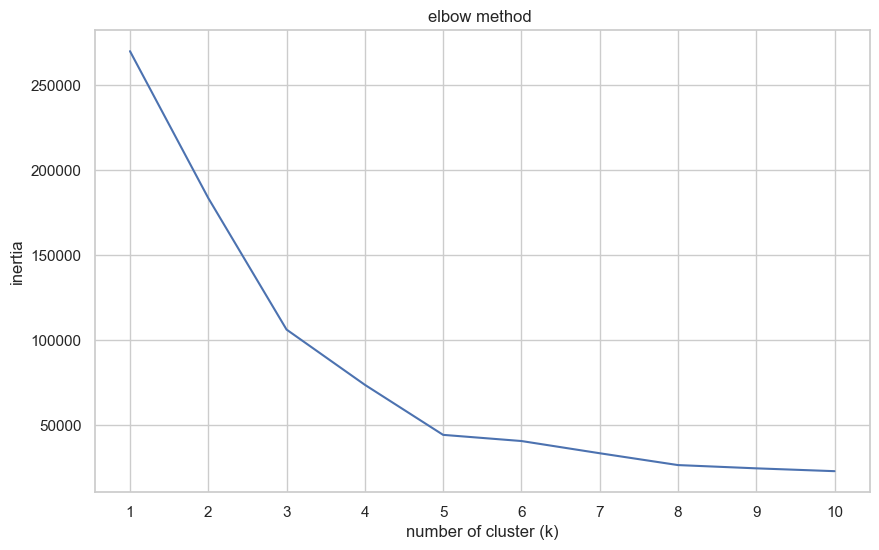

In [13]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(x=range(1, 11), y=elbow_score, markers='o')
plt.title('elbow method ')
plt.xlabel('number of cluster (k)')
plt.xticks(range(1, 11))
plt.ylabel('inertia')
plt.show()

In [17]:
optimal_k_new = 5
kmeans_new = KMeans(n_clusters=optimal_k_new, init='k-means++', random_state=42)

In [18]:
kmeans_new.fit(x)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [19]:
clust_predict =kmeans_new.predict(x)

In [21]:
sil_score_new = silhouette_score(x, clust_predict)
sil_score_new

0.553931997444648

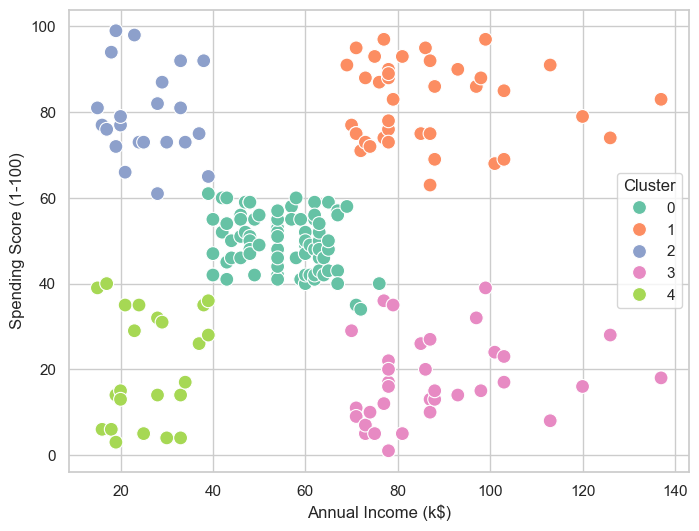

In [27]:
df_plot = pd.DataFrame(x, columns=["Annual Income (k$)", "Spending Score (1-100)"])
df_plot["Cluster"] = clust_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)
plt.show()

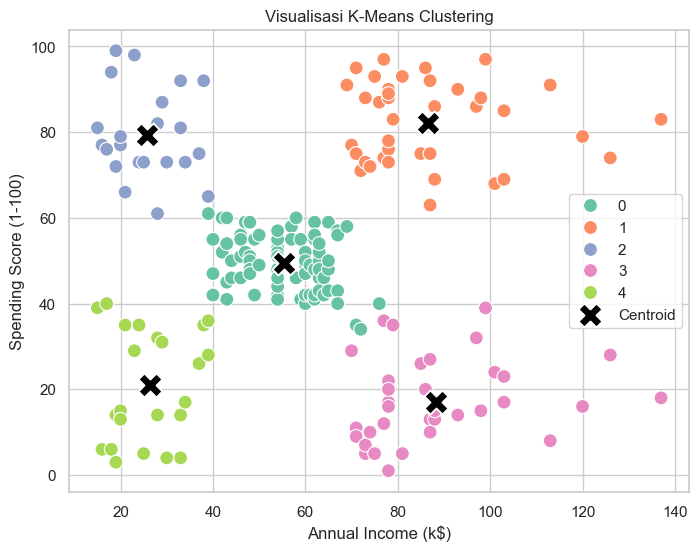

In [29]:
df_plot = pd.DataFrame(x, columns=["Annual Income (k$)", "Spending Score (1-100)"])
df_plot["Cluster"] = clust_predict

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set2",
    s=100
)

centers = pd.DataFrame(kmeans_new.cluster_centers_, columns=["Annual Income (k$)", "Spending Score (1-100)"])
sns.scatterplot(
    data=centers,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    s=300,
    color="black",
    marker="X",
    label="Centroid"
)

plt.title("Visualisasi K-Means Clustering")
plt.legend()
plt.show()